In [3]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Corpus = pd.read_csv("compiled_output.csv")
Corpus.head()

,Text,Label
0,complicated 3D character models are widely use...,background_claim
1,The range of breathtaking realistic 3D models ...,background_claim
2,a production cannot afford major revisions,background_claim
3,providing a flexible and efficient solution to...,own_claim
4,Skeleton Subspace Deformation (SSD) is the pre...,background_claim


In [5]:
len(Corpus)

13592

In [6]:
Corpus.shape

(13592, 2)

In [7]:
Corpus.isnull().any()

Text     False
Label    False
dtype: bool

In [8]:
Corpus.sample(5)

,Text,Label
13300,One solution is to use Baumgarte stabilization,own_claim
8086,The problem left here,background_claim
2669,In practice this has been considered the major...,background_claim
11944,a multitude of different cloth models have eme...,background_claim
10729,16,data


In [9]:
Corpus.columns

Index(['Text', 'Label'], dtype='object')

Text(0.5, 1.0, 'countplot')

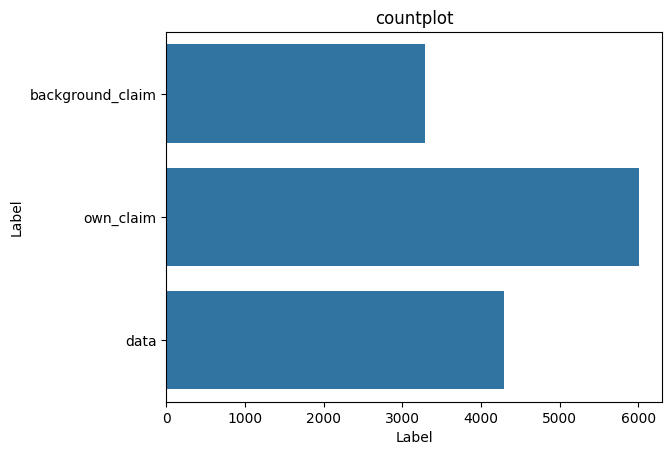

In [10]:
sns.countplot(Corpus.Label)
plt.xlabel("Label")
plt.title("countplot")

In [16]:

# 1. Removing Blank Spaces
Corpus['Text'].dropna(inplace=True)
# 2. Changing all text to lowercase
Corpus['text_original'] = Corpus['Text']
Corpus['Text'] = [entry.lower() for entry in Corpus['Text']]
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
Corpus['Text']= [word_tokenize(entry) for entry in Corpus['Text']]
# 4. Remove Stop words, Non-Numeric and perfoming Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

Corpus.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\PC/nltk_data'
    - 'c:\\Program Files\\Python312\\nltk_data'
    - 'c:\\Program Files\\Python312\\share\\nltk_data'
    - 'c:\\Program Files\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\PC\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [20]:
Corpus.drop(['text'], axis=1)
output_path = 'preprocessed_data_MS.csv'
Corpus.to_csv(output_path, index=False)

In [22]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Label'],test_size=0.1)

In [23]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [28]:
Tfidf_vect = TfidfVectorizer(max_features=3000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)
#print(len(Tfidf_vect.vocabulary_))

{'one': 1730, 'reviewer': 2133, 'mention': 1516, 'watch': 2892, 'oz': 1772, 'episode': 942, 'hook': 1180, 'right': 2145, 'exactly': 974, 'happen': 1143, 'br': 335, 'first': 1055, 'thing': 2629, 'strike': 2493, 'brutality': 364, 'unflinching': 2771, 'scene': 2225, 'violence': 2853, 'set': 2277, 'word': 2955, 'go': 1107, 'trust': 2732, 'show': 2314, 'timid': 2660, 'pull': 1977, 'punch': 1978, 'regard': 2063, 'drug': 848, 'sex': 2282, 'classic': 490, 'use': 2813, 'call': 400, 'nickname': 1660, 'give': 1101, 'oswald': 1749, 'maximum': 1488, 'security': 2254, 'state': 2452, 'penitentary': 1824, 'focus': 1061, 'mainly': 1434, 'emerald': 905, 'city': 484, 'experimental': 997, 'section': 2253, 'prison': 1938, 'cell': 436, 'front': 1076, 'face': 1016, 'privacy': 1940, 'high': 1163, 'agenda': 60, 'em': 902, 'home': 1176, 'many': 1456, 'aryan': 164, 'muslim': 1608, 'latino': 1324, 'christian': 473, 'italian': 1239, 'irish': 1234, 'scuffle': 2244, 'death': 705, 'stare': 2448, 'dodgy': 821, 'dealin

In [29]:
print(len(Tfidf_vect.vocabulary_))

3000


In [30]:
print(Train_X_Tfidf)


  (0, 2924)	0.1390753122926916
  (0, 2896)	0.07412735351588047
  (0, 2878)	0.14905733048510242
  (0, 2789)	0.1390753122926916
  (0, 2536)	0.1390753122926916
  (0, 2481)	0.14563567250311146
  (0, 2447)	0.10095556517591824
  (0, 2255)	0.05748708403031139
  (0, 2214)	0.34507328891429856
  (0, 2136)	0.1390753122926916
  (0, 1965)	0.16312619494728364
  (0, 1593)	0.14251519751370173
  (0, 1362)	0.08501067145083095
  (0, 1208)	0.14905733048510242
  (0, 1205)	0.14905733048510242
  (0, 1150)	0.3262523898945673
  (0, 1138)	0.1390753122926916
  (0, 1119)	0.1390753122926916
  (0, 1114)	0.06585494657367123
  (0, 1111)	0.4893785848418509
  (0, 1107)	0.13170989314734247
  (0, 1045)	0.05509316322579257
  (0, 1027)	0.11502442963809952
  (0, 1026)	0.1390753122926916
  (0, 833)	0.14905733048510242
  :	:
  (71, 419)	0.03419354065603623
  (71, 411)	0.04661514917658631
  (71, 408)	0.04661514917658631
  (71, 393)	0.026636639947414092
  (71, 383)	0.03974233832524088
  (71, 335)	0.0825226095197288
  (71, 303)	

In [31]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  62.5


In [33]:
#print(classification_report(Test_Y,predictions_SVM))

In [34]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)


Naive Bayes Accuracy Score ->  62.5


In [37]:
Corpus.head()

,reviews,Label,text_original,text,text_final
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","['one', 'reviewer', 'mention', 'watch', 'oz', ..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,"[a, wonderful, little, production, ., <, br, /...","['wonderful', 'little', 'production', 'br', 'b..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","['think', 'wonderful', 'way', 'spend', 'time',..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li...","['basically', 'family', 'little', 'boy', 'jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, 's, ``, love, in, the, time, ...","['petter', 'mattei', 'love', 'time', 'money', ..."


In [ ]:
preprocessed_data_MS

In [38]:
data = pd.read_csv("E:/MS_AI_IUB_DATASETS_2022/NLP/preprocessed_data_MS.csv")
data.head()

,reviews,Label,text_original,text,text_final
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewer', 'mention', 'watch', 'oz', ..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,"['a', 'wonderful', 'little', 'production', '.'...","['wonderful', 'little', 'production', 'br', 'b..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['think', 'wonderful', 'way', 'spend', 'time',..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"['basically', 'there', ""'s"", 'a', 'family', 'w...","['basically', 'family', 'little', 'boy', 'jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","['petter', 'mattei', ""'s"", '``', 'love', 'in',...","['petter', 'mattei', 'love', 'time', 'money', ..."


In [39]:
Corpus.drop(['text_final'], axis=1)
output_path = 'preprocessed_Text.csv'
Corpus.to_csv(output_path, index=False)

In [41]:
pre = pd.read_csv("E:/MS_AI_IUB_DATASETS_2022/NLP/preprocessed_Text.csv")
pre.head()

,reviews,Label,text_original,text,text_final
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewer', 'mention', 'watch', 'oz', ..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,"['a', 'wonderful', 'little', 'production', '.'...","['wonderful', 'little', 'production', 'br', 'b..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['think', 'wonderful', 'way', 'spend', 'time',..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"['basically', 'there', ""'s"", 'a', 'family', 'w...","['basically', 'family', 'little', 'boy', 'jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","['petter', 'mattei', ""'s"", '``', 'love', 'in',...","['petter', 'mattei', 'love', 'time', 'money', ..."


In [47]:
da = pre.drop(["reviews", "text_original", "text"], axis = 1)

da.head()

,Label,text_final
0,positive,"['one', 'reviewer', 'mention', 'watch', 'oz', ..."
1,positive,"['wonderful', 'little', 'production', 'br', 'b..."
2,positive,"['think', 'wonderful', 'way', 'spend', 'time',..."
3,negative,"['basically', 'family', 'little', 'boy', 'jake..."
4,positive,"['petter', 'mattei', 'love', 'time', 'money', ..."


In [48]:
output_path = 'Preprocess.csv'
da.to_csv(output_path, index=False)

In [49]:
df = pd.read_csv("E:/MS_AI_IUB_DATASETS_2022/NLP/preprocess.csv")
df.head()

,Label,text_final
0,positive,"['one', 'reviewer', 'mention', 'watch', 'oz', ..."
1,positive,"['wonderful', 'little', 'production', 'br', 'b..."
2,positive,"['think', 'wonderful', 'way', 'spend', 'time',..."
3,negative,"['basically', 'family', 'little', 'boy', 'jake..."
4,positive,"['petter', 'mattei', 'love', 'time', 'money', ..."
